In [1]:
!pip install geopandas

     |████████████████████████████████| 921kB 2.7MB/s eta 0:00:01
     |████████████████████████████████| 11.8MB 29kB/s  eta 0:00:01
     |████████████████████████████████| 10.1MB 32kB/s  eta 0:00:01
     |████████████████████████████████| 1.5MB 6.7MB/s eta 0:00:01��███▋                     | 491kB 6.7MB/s eta 0:00:01


In [2]:
!pip install geoplot # or use !conda install geoplot -c conda-forge 

     |████████████████████████████████| 8.9MB 412kB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 51kB 601kB/s  eta 0:00:01
     |████████████████████████████████| 225kB 6.6MB/s eta 0:00:01
     |████████████████████████████████| 18.0MB 166kB/s eta 0:00:01    |█████████                       | 5.0MB 4.2MB/s eta 0:00:04     |███████████████████▌            | 11.0MB 1.5MB/s eta 0:00:05     |██████████████████████▍         | 12.6MB 1.5MB/s eta 0:00:04
     |████████████████████████████████| 102kB 713kB/s ta 0:00:011
  Created wheel for cartopy: filename=Cartopy-0.17.0-cp36-cp36m-linux_x86_64.whl size=9739069 sha256=9e8d7cd6e4144e8d19a794d10470b921ed98a99b426578632594e7f0594fb194
  Stored in directory: /home/nbuser/.cache/pip/wheels/cd/cf/40/539f798f94e921e94fd376a5f9d213a6febe77754c0b187c73
Successfully built cartopy
  Created wheel for mapclassify: filenam

  Created wheel for pyshp: filename=pyshp-2.1.0-cp36-none-any.whl size=46296 sha256=3f5828febfba785a399206e181e9f7298f868b1e77e497baa05cb38dc81ef302
  Stored in directory: /home/nbuser/.cache/pip/wheels/a6/0c/de/321b5192ad416b328975a2f0385f72c64db4656501eba7cc1a
Successfully built mapclassify pyshp


In [3]:
import geopandas as gp

In [4]:
import geoplot as gplt

In [5]:
%matplotlib inline

In [6]:
import matplotlib.pyplot as plt

In [7]:
import pandas as pd

In [8]:
import geoplot.crs as gcrs

In [9]:
data_path = "./data/London_Borough_Excluding_MHW.shp"
londonBoroughs = gp.read_file(data_path)

londonBoroughs.head()

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry
0,Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.6 160201.8, 516407.3 160210.5..."
1,Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.2 159504.7, 535005.5 159502, ..."
2,Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.6 157530.4, 540361.2 157551.9..."
3,Hounslow,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.8 178100, 521967.7 178096.8, ..."
4,Ealing,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.5 182881.6, 510249.9 182886, ..."


In [10]:
londonBoroughs = londonBoroughs.to_crs(epsg=4326)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


In [11]:
data_path = "~/library/data/processed/borough-unemployment-and-business-data.csv" #use csv file
df = pd.read_csv(data_path)
df.drop('Unnamed: 0', axis=1, inplace=True)
df.year = df.year.astype(int)

df.head()

,area,year,3_year_survival_number,3_year_survival_rate,number_of_jobs,job_density,unemployment_rate,NVQ4_rate,youth_unemployment_rate,no_qualif_rate,NVQ3_rate,NVQ2_rate,NVQ1_rate
0,Barking and Dagenham,2011,455.0,54.5,54000,0.45,13.0,33.2,22.734367,8.6,13.7,16.3,14.3
1,Barnet,2011,1635.0,57.7,147000,0.62,8.0,57.3,9.944418,3.7,10.9,9.3,7.5
2,Bexley,2011,555.0,58.7,78000,0.53,8.0,29.6,10.870386,4.8,19.0,19.2,17.2
3,Brent,2011,1085.0,56.7,115000,0.53,10.8,33.8,14.681718,8.2,14.8,11.4,9.2
4,Bromley,2011,990.0,62.7,119000,0.61,6.9,47.1,10.269752,5.4,17.5,12.8,10.5


In [12]:
data_path = "~/library/data/processed/active-youth.csv" #use csv file
df2 = pd.read_csv(data_path)
df2.drop('Unnamed: 0', axis=1, inplace=True)

df2.head()

,Code,Area,2011,2012,2013,2014,2015
0,E09000001,City of London,324,419,412,429,306
1,E09000002,Barking and Dagenham,9611,10111,10392,11170,10341
2,E09000003,Barnet,14933,15652,15897,17124,15742
3,E09000004,Bexley,13247,13568,13513,13753,13316
4,E09000005,Brent,13997,13868,13690,14515,13969


In [13]:
df2 = df2.melt(id_vars=["Code", "Area"], var_name='Year', value_name='Active_pop')
df2.Year = df2.Year.astype(int)

## 2011

In [14]:
df11 = df[df['year']==2011]

In [15]:
df2_11 = df2[df2['Year']==2011]

In [16]:
df11 = df11.merge(df2_11, left_on='area', right_on='Area')

In [17]:
geojobs11 = londonBoroughs.merge(df11, left_on='NAME', right_on='area')
            #geodataframe       #dataframe

In [18]:
geojobs11['Active_density']=geojobs11['Active_pop']/geojobs11['HECTARES']

## 2012

In [19]:
df12 = df[df['year']==2012]

In [20]:
df2_12 = df2[df2['Year']==2012]

In [21]:
df12 = df12.merge(df2_12, left_on='area', right_on='Area')

In [22]:
geojobs12 = londonBoroughs.merge(df12, left_on='NAME', right_on='area')
            #geodataframe       #dataframe

In [23]:
geojobs12['Active_density']=geojobs12['Active_pop']/geojobs12['HECTARES']

## 2013

In [24]:
df13 = df[df['year']==2013]

In [25]:
df2_13 = df2[df2['Year']==2013]

In [26]:
df13 = df13.merge(df2_13, left_on='area', right_on='Area')

In [27]:
geojobs13 = londonBoroughs.merge(df13, left_on='NAME', right_on='area')
            #geodataframe       #dataframe

In [28]:
geojobs13['Active_density']=geojobs13['Active_pop']/geojobs13['HECTARES']

## 2014

In [29]:
df14 = df[df['year']==2014]

In [30]:
df2_14 = df2[df2['Year']==2014]

In [31]:
df14 = df14.merge(df2_14, left_on='area', right_on='Area')

In [32]:
geojobs14 = londonBoroughs.merge(df14, left_on='NAME', right_on='area')
            #geodataframe       #dataframe

In [33]:
geojobs14['Active_density']=geojobs14['Active_pop']/geojobs14['HECTARES']

## Cartograms

Text(0.5, 1.0, '2014')

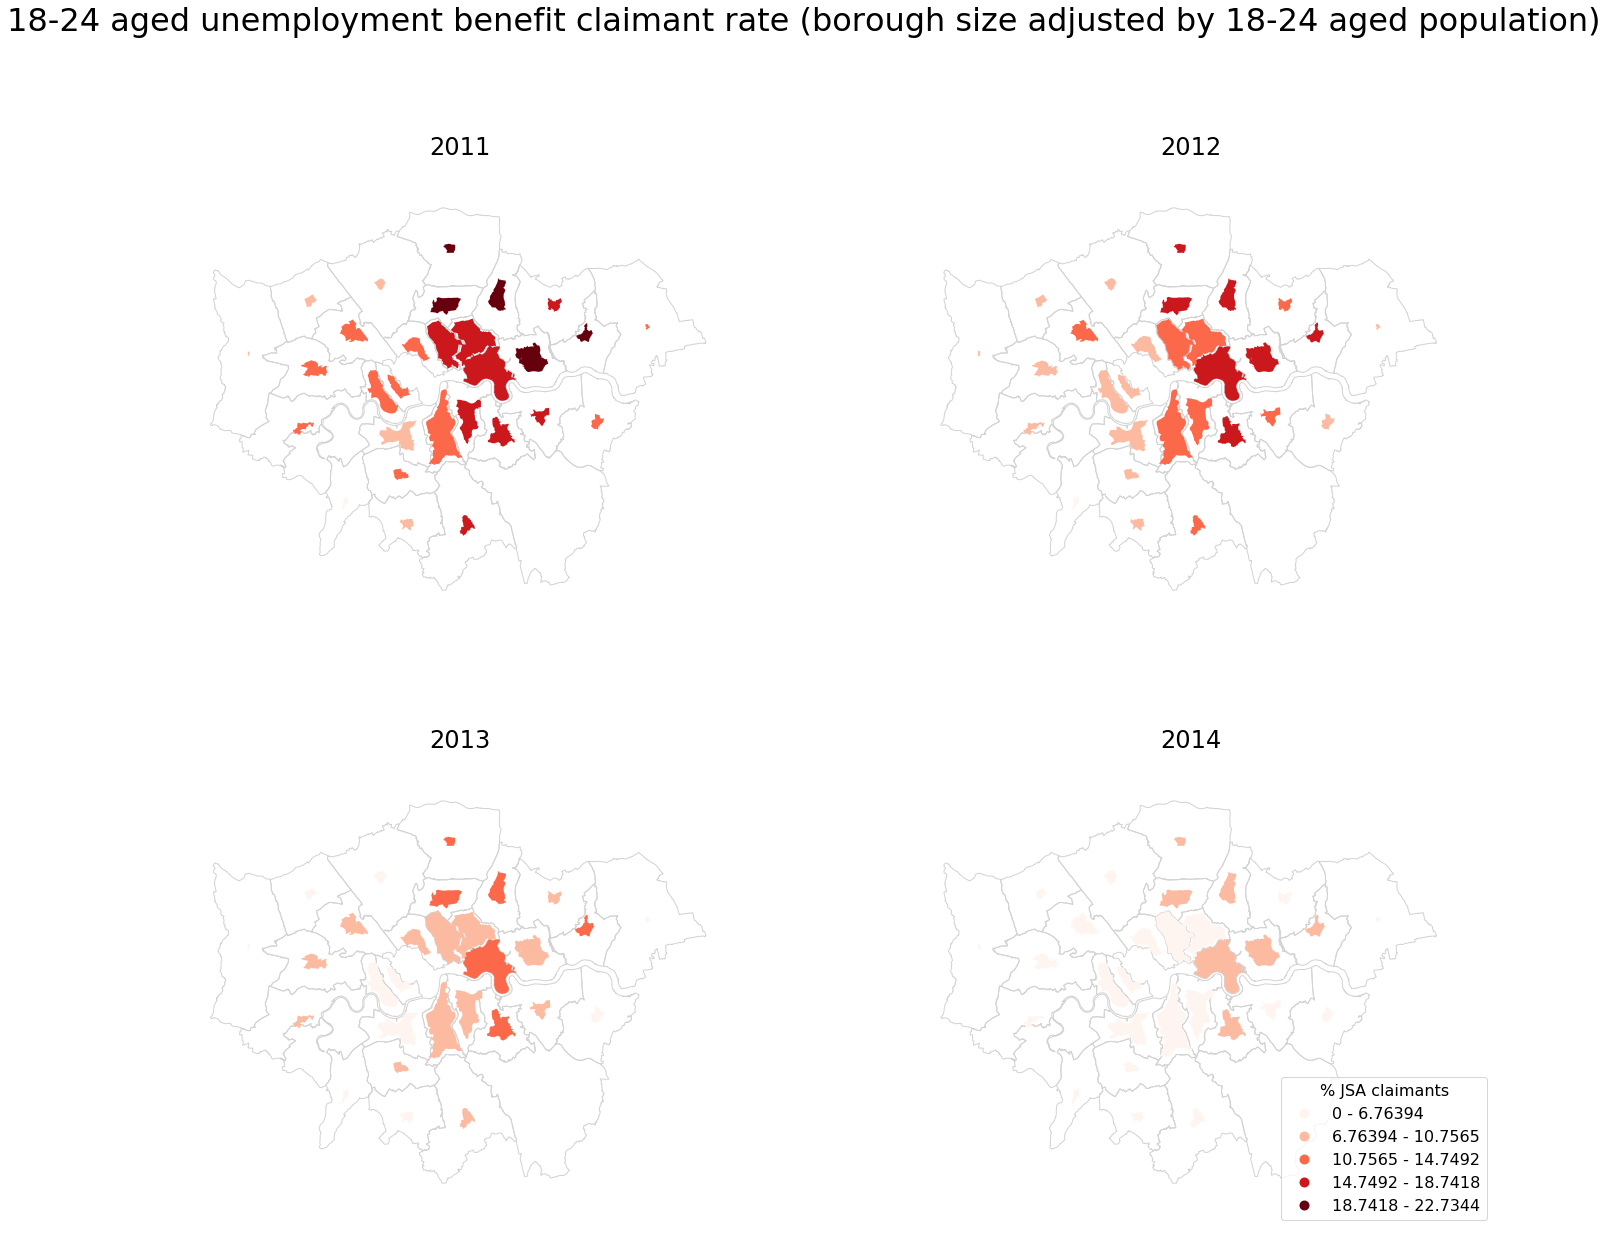

In [45]:
import mapclassify as mc 
scheme = mc.EqualInterval(df.youth_unemployment_rate, k=5)


proj=gcrs.OSGB()
fig, axarr = plt.subplots(2, 2, figsize=(24, 20), subplot_kw={'projection': proj})
plt.suptitle("""18-24 aged unemployment benefit claimant rate (borough size adjusted by 18-24 aged population)""", fontsize= 32)

ax1 = gplt.cartogram(
    geojobs11, 
    scale='Active_density', #taking the population density instead of absolute no. to compensate for the proportional to size scaling
    limits=(0, 1),
    hue='youth_unemployment_rate',
    cmap='Reds',
    scheme=scheme,
    figsize=(28, 32),
    edgecolor='None',
    ax=axarr[0][0]
)

gplt.polyplot(geojobs11, edgecolor='lightgray', ax=ax1)
axarr[0][0].set_title("""2011""", fontsize=24)


ax2 = gplt.cartogram(
    geojobs12, 
    scale='Active_density', #taking the population density instead of absolute no. to compensate for the proportional to size scaling
    limits=(0, 1),
    hue='youth_unemployment_rate',
    cmap='Reds',
    scheme=scheme,
    figsize=(28, 32),
    edgecolor='None',
    ax=axarr[0][1]
)

gplt.polyplot(geojobs12, edgecolor='lightgray', ax=ax2)
axarr[0][1].set_title("""2012""", fontsize=24)

ax3 = gplt.cartogram(
    geojobs13, 
    scale='Active_density', #taking the population density instead of absolute no. to compensate for the proportional to size scaling
    limits=(0, 1),
    hue='youth_unemployment_rate',
    cmap='Reds',
    scheme=scheme,
    figsize=(28, 32),
    edgecolor='None',
    ax=axarr[1][0]
)

gplt.polyplot(geojobs13, edgecolor='lightgray', ax=ax3)
axarr[1][0].set_title("""2013""", fontsize=24)

ax4 = gplt.cartogram(
    geojobs14, 
    scale='Active_density', #taking the population density instead of absolute no. to compensate for the proportional to size scaling
    limits=(0, 1),
    hue='youth_unemployment_rate',
    cmap='Reds',
    scheme=scheme,
    figsize=(28, 32),
    legend=True, 
    legend_var='hue', 
    legend_kwargs={'title':'% JSA claimants', 'title_fontsize':16, 'loc': 'lower right', 'fontsize':16},
    edgecolor='None',
    ax=axarr[1][1]
)

gplt.polyplot(geojobs14, edgecolor='lightgray', ax=ax4)
axarr[1][1].set_title("""2014""", fontsize=24)